In [183]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Activation
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K

batch_size = 120
num_classes = 10
epochs = 12

img_rows,img_cols = 28,28

In [157]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()
x_train_ = x_train
y_train_ = y_train
x_test_ = x_test
y_test_ = y_test
x_train[0].shape
x_train.shape

(60000, 28, 28)

y: 5


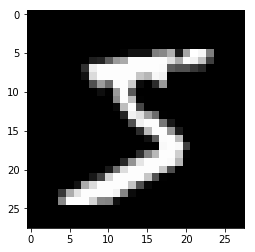

In [158]:
import matplotlib.pylab as plt

plt.imshow(x_train[0],'gray')
print('y:',y_train[0])

In [159]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0],1,img_rows,img_cols)
    x_test = x_test.reshape(x_test.shape[0],1,img_rows,img_cols)
    input_shape = (1,img_rows,img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0],img_rows,img_cols,1)
    x_test = x_test.reshape(x_test.shape[0],img_rows,img_cols,1)
    input_shape = (img_rows,img_cols,1)
    
x_train.shape

(60000, 28, 28, 1)

In [160]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print('x_train shape:',x_train.shape)
print(x_train.shape[0],'train samples')
print(x_test.shape[0],'test samples')


# convert scalar y to one-hot vector Y
y_train = keras.utils.to_categorical(y_train,num_classes)
y_test = keras.utils.to_categorical(y_test,num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [186]:
model = Sequential()
model.add(Conv2D(32
                ,kernel_size=(3,3)
                ,input_shape=input_shape))
convOut1 = Activation('relu')
model.add(convOut1)
model.add(Conv2D(64
                ,(3,3)))
convOut2 = Activation('relu')
model.add(convOut2)
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes,activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_3 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
activation_4 (Activation)    (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 9216)              0         
__________

In [187]:
model.compile(loss=keras.losses.categorical_crossentropy
             ,optimizer=keras.optimizers.Adadelta()
             ,metrics=['accuracy'])

history = model.fit(x_train,y_train
         ,batch_size=batch_size
         ,epochs=epochs
         ,verbose=1
         ,validation_data=(x_test,y_test))

score = model.evaluate(x_test,y_test,verbose=0)
print('Test loss:',score[0])
print('Test accuracy:',score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 139s 2ms/step - loss: 0.2675 - acc: 0.9170 - val_loss: 0.0588 - val_acc: 0.9810
Epoch 2/12
60000/60000 [==============================] - 138s 2ms/step - loss: 0.0915 - acc: 0.9722 - val_loss: 0.0454 - val_acc: 0.9851
Epoch 3/12
60000/60000 [==============================] - 138s 2ms/step - loss: 0.0690 - acc: 0.9792 - val_loss: 0.0393 - val_acc: 0.9870
Epoch 4/12
60000/60000 [==============================] - 138s 2ms/step - loss: 0.0569 - acc: 0.9830 - val_loss: 0.0329 - val_acc: 0.9890
Epoch 5/12
60000/60000 [==============================] - 142s 2ms/step - loss: 0.0479 - acc: 0.9856 - val_loss: 0.0312 - val_acc: 0.9898
Epoch 6/12
60000/60000 [==============================] - 142s 2ms/step - loss: 0.0436 - acc: 0.9869 - val_loss: 0.0308 - val_acc: 0.9901
Epoch 7/12
60000/60000 [==============================] - 143s 2ms/step - loss: 0.0390 - acc: 0.9881 - val_loss: 0.0303 - 

In [188]:
model.save("model_cnn")

In [189]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

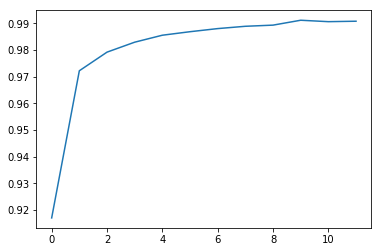

In [190]:
plt.plot(history.history['acc'])

In [191]:
from keras.utils import plot_model

In [192]:
plot_model(model,to_file='model.png',show_shapes=True,show_layer_names=True)

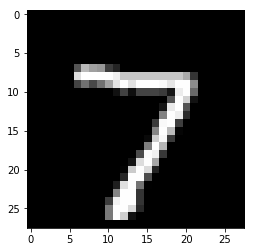

In [193]:
plt.imshow(x_test_[0],'gray')

In [194]:
import numpy as np

In [195]:
predicts = model.predict(x_test)
print(predicts)

[[2.5557967e-11 3.3475847e-10 2.0251857e-08 ... 9.9999988e-01
  1.2827305e-11 2.0674058e-09]
 [7.9883522e-10 8.1236429e-10 1.0000000e+00 ... 2.2411694e-14
  1.1212252e-11 2.8338402e-13]
 [2.1566508e-07 9.9997389e-01 4.6741616e-06 ... 8.0314630e-06
  1.5969495e-06 1.7613439e-07]
 ...
 [8.4578903e-18 4.6109106e-11 1.1436059e-14 ... 1.2373280e-10
  2.0504021e-09 2.2833360e-08]
 [2.1547547e-11 2.7155210e-13 6.3336740e-14 ... 8.0840716e-13
  5.9304725e-06 1.5075816e-11]
 [5.4469100e-09 2.1044836e-11 9.1717531e-09 ... 1.1357921e-12
  9.6188058e-10 1.0035923e-11]]


In [129]:
list(map(np.argmax,predicts))[0]

7

In [138]:
x_test.shape

(10000, 28, 28, 1)

In [161]:
from keras.models import Model
layer_name = 'conv2d_3'

intermediate_layer_model = Model(inputs=model.input,outputs=model.get_layer(layer_name).output)

intermediate_layer_output = intermediate_layer_model.predict(x_train)

In [162]:
intermediate_layer_output.shape

(60000, 26, 26, 32)

In [164]:
intermediate_layer_output = intermediate_layer_output.reshape(intermediate_layer_output.shape[0],32,26,26)

In [173]:
intermediate_layer_output[0].shape

(32, 26, 26)

In [175]:
np.argmax(y_train[0])

5

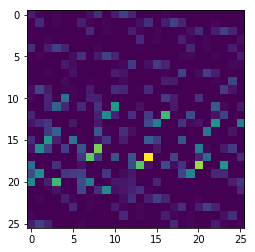

In [182]:
plt.imshow(intermediate_layer_output[0][4])